## MNIST DATA

In [1]:
# Pandas to create dataframes from the numerical arrays
import pandas as pd

# NumPy to handle the numerical arrays
import numpy as np

# Matplotlib & Seaborn for plotting...
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

# Scikit-learn to get the data and perform t-SNE
from sklearn import datasets
from sklearn import manifold

%matplotlib inline

In [3]:
data = datasets.fetch_openml('mnist_784',
                             version = 1,
                             return_X_y = True)
pixel_values, targets = data
targets = targets.astype(int)

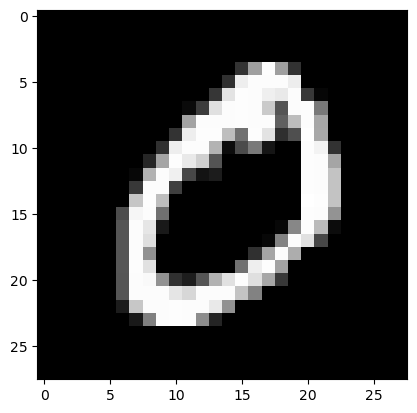

In [4]:
single_image = pixel_values.iloc[1, :].values.reshape(28, 28)
plt.imshow(single_image, cmap = 'gray')
plt.show()

In [5]:
tsne = manifold.TSNE(n_components = 2, random_state = 42)

transformed_data = tsne.fit_transform(pixel_values.iloc[:3000, :])

In [6]:
tsne_df = pd.DataFrame(
    np.column_stack((transformed_data, targets[:3000])),
    columns = ['x', 'y', 'targets'])
tsne_df.loc[:, 'targets'] = tsne_df.targets.astype(int)

In [7]:
tsne_df.head(10)

,x,y,targets
0,18.491558,-8.334816,5.0
1,56.303303,-2.538404,0.0
2,1.129804,-54.124607,4.0
3,-39.973621,9.919919,1.0
4,-8.952155,-32.843880,9.0
5,-4.574981,28.017246,2.0
6,-24.557365,47.445141,1.0
7,9.239387,13.973044,3.0
8,-23.763588,41.912113,1.0
9,-13.189152,-16.208967,4.0


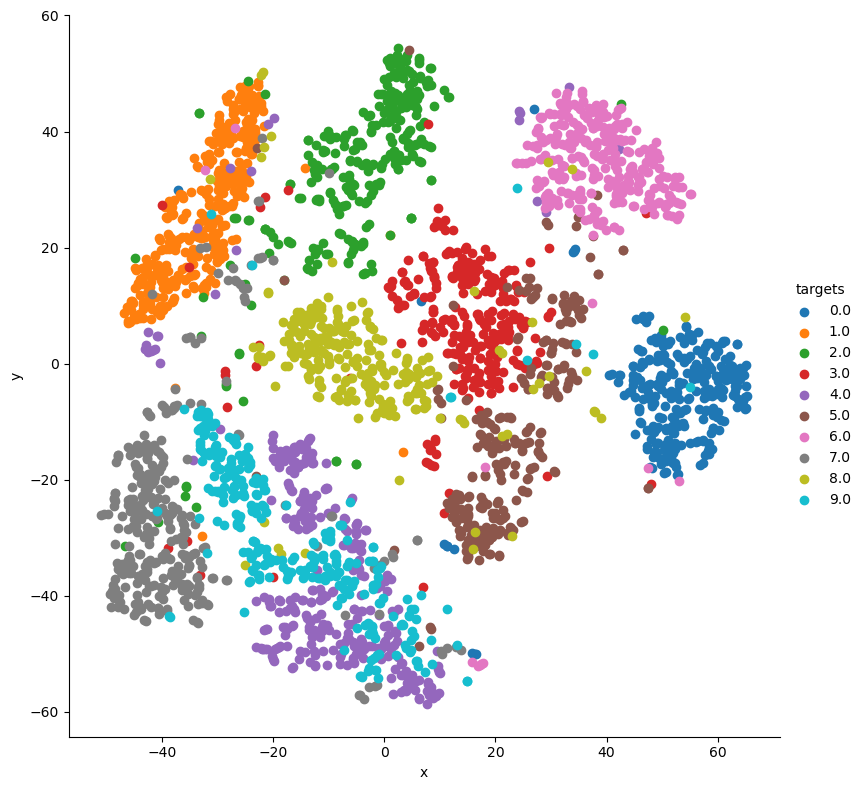

In [10]:
grid = sns.FacetGrid(tsne_df, hue = "targets", height = 8)
grid.map(plt.scatter, "x", "y").add_legend()
plt.show()

In [12]:
spotify = pd.read_csv("spotify_data.csv")
spotify.head(5)

,Songs & Artist,Streams,Daily
0,The Weeknd - Blinding Lights,4463658617,1619447.0
1,Ed Sheeran - Shape of You,4018102402,1001507.0
2,Lewis Capaldi - Someone You Loved,3588673578,1506961.0
3,Harry Styles - As It Was,3544187311,1611374.0
4,Post Malone - Sunflower,3518744128,1337404.0


In [15]:
from tensorflow.keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Reshape the data to include the channels dimension
x_train = x_train.reshape((len(x_train), 28, 28, 1))
x_test = x_test.reshape((len(x_test), 28, 28, 1))

In [18]:
from tensorflow.keras import layers, models

# Encoder
input_img = layers.Input(shape = (28, 28, 1))
x = layers.Conv2D(16, (3, 3), activation = 'relu', padding = 'same')(input_img)
x = layers.MaxPooling2D((2, 2), padding = 'same')(x)
x = layers.Conv2D(8, (3, 3), activation = 'relu', padding = 'same')(x)
encoded = layers.MaxPooling2D((2, 2), padding = 'same')(x)

# Decoder
x = layers.Conv2D(8, (3, 3), activation = 'relu', padding = 'same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation = 'relu', padding = 'same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation = 'sigmoid', padding = 'same')(x)

# Autoencoder Model
autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy')

In [19]:
# Train the autoencoder
autoencoder.fit(x_train, x_train,
                epochs = 50,
                batch_size = 256,
                shuffle = True,
                validation_data = (x_test, x_test))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 30s 118ms/step - loss: 0.4252 - val_loss: 0.1048
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 29s 124ms/step - loss: 0.1001 - val_loss: 0.0896
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 119ms/step - loss: 0.0889 - val_loss: 0.0849
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 117ms/step - loss: 0.0849 - val_loss: 0.0822
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 120ms/step - loss: 0.0822 - val_loss: 0.0799
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 31s 130ms/step - loss: 0.0803 - val_loss: 0.0786
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 29s 123ms/step - loss: 0.0791 - val_loss: 0.0776
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 29s 123ms/step - loss: 0.0782 - val_loss: 0.0768
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 30s 128ms/step - loss: 0.0774 - val_loss: 0.0761
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 30s 128ms/step - loss: 0.0768 - val_loss: 0.0756
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 30s 126ms/step - loss: 0.0760 - val_loss: 0.0752
Epoch 12/50
235/235

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


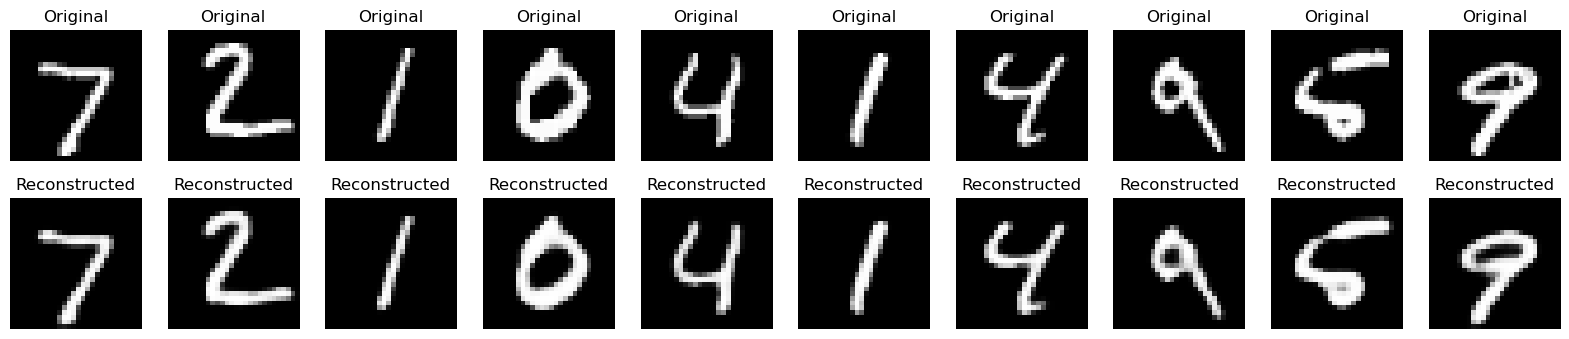

In [28]:
import matplotlib.pyplot as plt

decoded_imgs = autoencoder.predict(x_test)

# Display original vs reconstructed images
n = 10 # Number of digits to display
plt.figure(figsize = (20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap = 'gray')
    plt.title("Original")
    plt.axis("off")
    
    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap = 'gray')
    plt.title("Reconstructed")
    plt.axis("off")

plt.show()

In [30]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(x_test.flatten(), decoded_imgs.flatten())
print("Mean Squared Error:", mse)

Mean Squared Error: 0.0030879362
